In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv(r'C:\Users\SAMANVITHA\Downloads\employee_data (1).csv')

In [28]:
df

,Employee_ID,Age,Experience,Salary
0,101,59.0,NaN,59107.0
1,102,NaN,19.0,NaN
2,103,28.0,4.0,66107.0
3,104,NaN,17.0,62587.0
4,105,32.0,23.0,35549.0
5,106,37.0,20.0,32538.0
6,107,29.0,26.0,69295.0
7,108,42.0,NaN,45467.0
8,109,38.0,15.0,36550.0
9,110,55.0,20.0,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee_ID  30 non-null     int64  
 1   Age          25 non-null     float64
 2   Experience   25 non-null     float64
 3   Salary       25 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [30]:

# df['Age']=df['Age'].fillna(0)

In [31]:
df['Age']=df['Age'].fillna(0)
df['Salary']=df['Salary'].fillna(0)
df['Experience']=df['Experience'].fillna(0)
df=df.drop(df[df['Salary']==0].index)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee_ID  25 non-null     int64  
 1   Age          25 non-null     float64
 2   Experience   25 non-null     float64
 3   Salary       25 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1000.0 bytes


In [33]:
df.head(5)

,Employee_ID,Age,Experience,Salary
0,101,59.0,0.0,59107.0
2,103,28.0,4.0,66107.0
3,104,0.0,17.0,62587.0
4,105,32.0,23.0,35549.0
5,106,37.0,20.0,32538.0


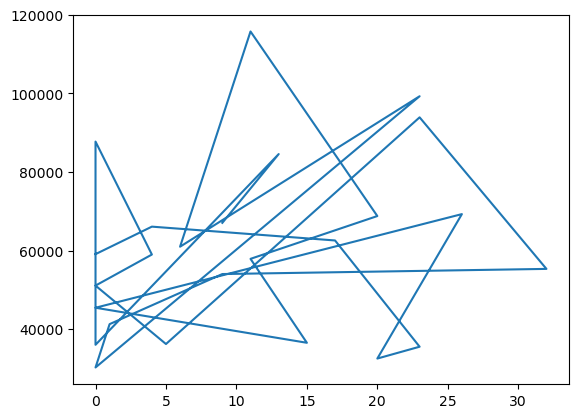

In [54]:
X=df[['Experience']]
Y=df['Salary']

#Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,train_size=0.2,random_state=40)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.4,random_state=40)
Xtrain
plt.plot(X,Y)

<Axes: xlabel='Age', ylabel='Salary'>

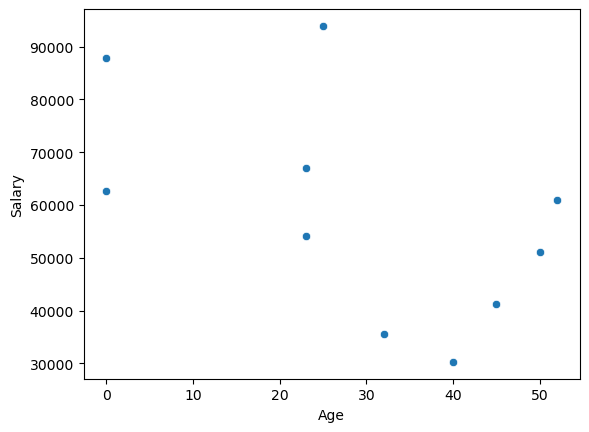

In [35]:
sns.scatterplot(data=Xtest,x='Age',y=Ytest)


<function matplotlib.pyplot.show(close=None, block=None)>

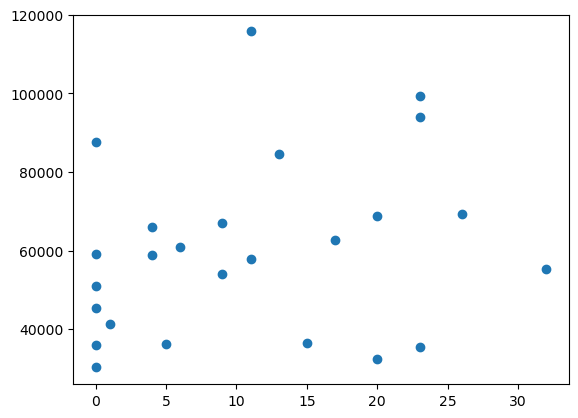

In [36]:
x=df['Experience']
y=df['Salary']

plt.scatter(x,y)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

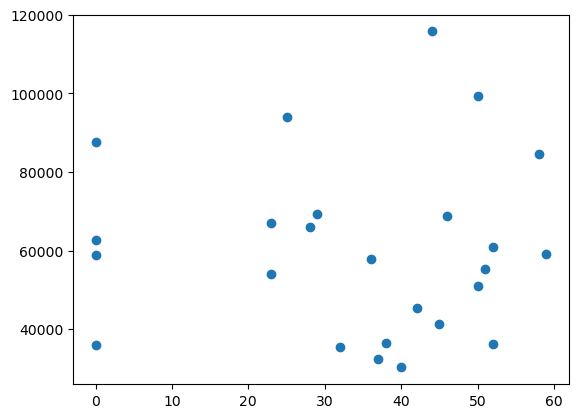

In [37]:
x=df['Age']
y=df['Salary']

plt.scatter(x,y)
plt.show

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain,Ytrain) 

model.coef_ 

array([315.29292451, 387.03990094])

In [39]:
model.intercept_

44741.6460838281

In [40]:
Xtest

,Age,Experience
20,23.0,9.0
29,23.0,9.0
19,45.0,1.0
24,50.0,0.0
18,40.0,0.0
4,32.0,23.0
26,0.0,0.0
3,0.0,17.0
16,52.0,6.0
22,25.0,23.0


In [41]:
Ytrain

5      32538.0
11     57913.0
21     55355.0
27     36038.0
25     59007.0
0      59107.0
12     68803.0
15    115774.0
28     84577.0
17     99291.0
2      66107.0
23     36235.0
6      69295.0
8      36550.0
7      45467.0
Name: Salary, dtype: float64

In [42]:
pred=model.predict(Xtest)
pred

array([55476.74245597, 55476.74245597, 59316.86758763, 60506.29230923,
       57353.36306415, 63732.93738971, 44741.64608383, 51321.32439981,
       63459.11756389, 61525.88691815])

<Axes: xlabel='Age', ylabel='Salary'>

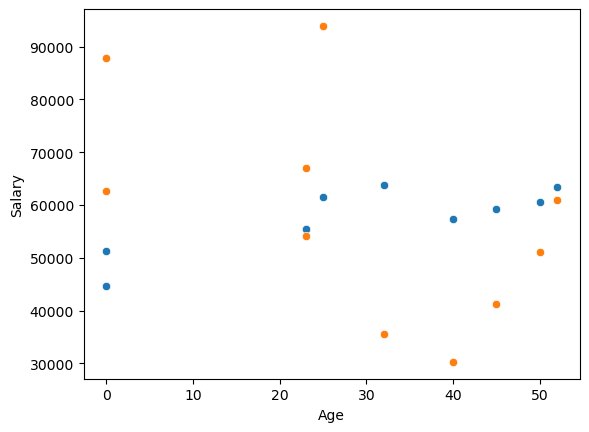

In [43]:
sns.scatterplot(data=Xtest,x='Age',y=pred)
sns.scatterplot(data=Xtest,x='Age',y=Ytest)

<Axes: xlabel='Experience', ylabel='Salary'>

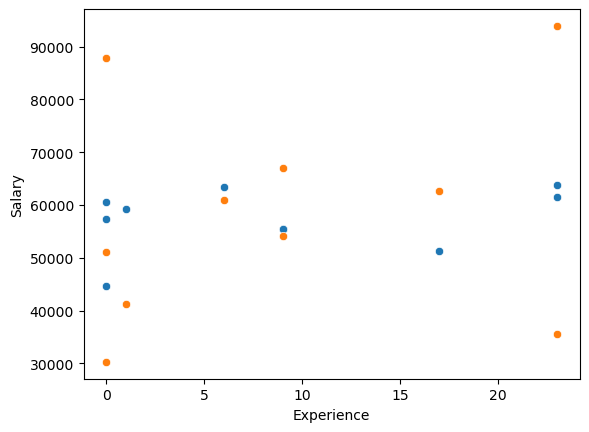

In [44]:
sns.scatterplot(data=Xtest,x='Experience',y=pred)
sns.scatterplot(data=Xtest,x='Experience',y=Ytest)

In [45]:
model.score(Xtest,Ytest)

-0.30985616307761354

In [46]:
model.score(Xtrain,Ytrain)

0.10619178228111259

In [48]:
from sklearn.metrics import mean_squared_error
pred
mean_squared_error(Ytest,pred)


511021347.2080677

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Ytest,pred)

18485.472051282955

In [51]:
from sklearn.preprocessing import PolynomialFeatures

#step 1 creating polynomial features model
poly=PolynomialFeatures(degree=2)

#step 2 transform x -->xpoly

xpoly=poly.fit_transform(Xtrain)
# xpoly
model=LinearRegression()
model.fit(xpoly,Ytrain)

LinearRegression()

In [52]:
xtest_poly=poly.transform(Xtest)
ypred=model.predict(xtest_poly)
ypred

array([56338.54487985, 56338.54487985, 49363.62286601, 49301.15627472,
       44212.00845455, 59321.67914734, 45276.28271186, 55987.38144116,
       66146.33566328, 55009.72572624])

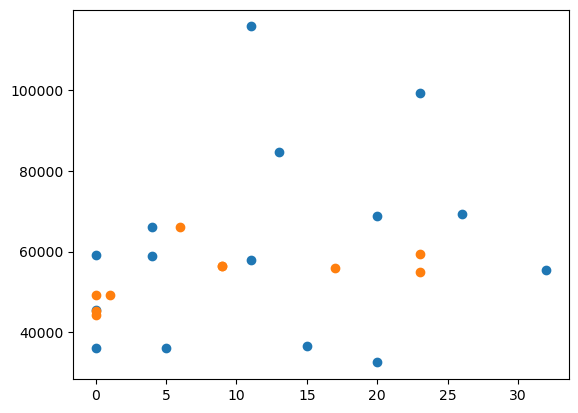

In [55]:
plt.scatter(Xtrain,Ytrain)
plt.scatter(Xtest,ypred)